In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error 
import seaborn as sns

In [2]:
dataset=pd.read_csv('Wax Crude Oil Viscosity Data.csv')

In [3]:
df=dataset.copy()
df

,Well Label,Flowing Temperature (0C),Pour-Point(0C),API gravity,Viscosity(centipoises)
0,C,132,85,37.19,5.9607
1,F,109,100,22.55,14.1513
2,C,115,99,23.94,12.2412
3,F,139,87,36.83,4.3893
4,A,127,89,33.27,7.3245
...,...,...,...,...,...
995,E,134,95,27.19,5.9897
996,C,110,92,30.06,9.3202
997,D,107,85,37.41,5.8110
998,C,127,98,24.10,11.5144


In [4]:
df.describe()

,Flowing Temperature (0C),Pour-Point(0C),API gravity,Viscosity(centipoises)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.881000,92.497000,30.238160,8.468241
std,11.928165,4.307266,4.484083,3.372493
min,100.000000,85.000000,22.300000,3.720400
25%,109.000000,89.000000,26.307500,5.644525
50%,120.000000,92.000000,30.485000,7.948400
75%,130.000000,96.000000,34.070000,10.713200
max,140.000000,100.000000,37.950000,17.939600


In [5]:
df.isnull().any()

Well Label                  False
Flowing Temperature (0C)    False
Pour-Point(0C)              False
API gravity                 False
Viscosity(centipoises)      False
dtype: bool

<ipython-input-6-37d59a812d95>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,1)


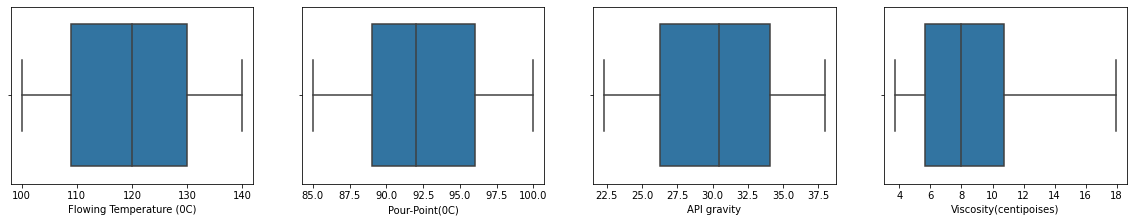

In [6]:
figure=plt.subplots(figsize=(20,15))

plt.subplot(4,4,1)
sns.boxplot(x=df['Flowing Temperature (0C)'],data=df)

plt.subplot(4,4,2)
sns.boxplot(x=df['Pour-Point(0C)'],data=df)

plt.subplot(4,4,3)
sns.boxplot(x=df['API gravity'],data=df)

plt.subplot(4,4,4)
sns.boxplot(x=df['Viscosity(centipoises)'],data=df)

plt.show()

In [7]:
x=df.drop(['Well Label','Viscosity(centipoises)'],axis=1)
y=df['Viscosity(centipoises)']

In [8]:
x

,Flowing Temperature (0C),Pour-Point(0C),API gravity
0,132,85,37.19
1,109,100,22.55
2,115,99,23.94
3,139,87,36.83
4,127,89,33.27
...,...,...,...
995,134,95,27.19
996,110,92,30.06
997,107,85,37.41
998,127,98,24.10


In [9]:
y

0       5.9607
1      14.1513
2      12.2412
3       4.3893
4       7.3245
        ...   
995     5.9897
996     9.3202
997     5.8110
998    11.5144
999    14.2412
Name: Viscosity(centipoises), Length: 1000, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.20)

In [11]:
# Normalization
mean=x_train.mean(axis=0)
x_train-=mean
std=x_train.std(axis=0)
x_train/=std

x_test-=mean
x_test/=std

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 3)
(800,)
(200, 3)
(200,)


In [13]:
y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [14]:
model=keras.Sequential(
[keras.layers.Dense(units=512,input_dim=x_train.shape[1],activation='relu',name='input_layer'), 
  
keras.layers.Dense(units=256,activation='relu',name='layer2'), 
 keras.layers.Dropout(rate=0.2),
 
keras.layers.Dense(units=64,activation='relu',name='layer3'),
 
keras.layers.Dense(y_train.shape[1],activation='relu',name='output_layer')])      


In [15]:
model.compile(loss = ['mse'], optimizer = 'Adam', metrics = ['mse'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 512)               2048      
_________________________________________________________________
layer2 (Dense)               (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
layer3 (Dense)               (None, 64)                16448     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 149,889
Trainable params: 149,889
Non-trainable params: 0
_________________________________________________________________


In [18]:
history=model.fit(x_train, y_train,validation_split=0.2,epochs=200,verbose=2,batch_size=128)
history  

Epoch 1/200
5/5 - 1s - loss: 78.1994 - mse: 78.1994 - val_loss: 75.1862 - val_mse: 75.1862
Epoch 2/200
5/5 - 0s - loss: 63.8409 - mse: 63.8409 - val_loss: 54.6795 - val_mse: 54.6795
Epoch 3/200
5/5 - 0s - loss: 42.0163 - mse: 42.0163 - val_loss: 28.5813 - val_mse: 28.5813
Epoch 4/200
5/5 - 0s - loss: 20.6881 - mse: 20.6881 - val_loss: 16.4771 - val_mse: 16.4771
Epoch 5/200
5/5 - 0s - loss: 16.4439 - mse: 16.4439 - val_loss: 18.4832 - val_mse: 18.4832
Epoch 6/200
5/5 - 0s - loss: 14.5790 - mse: 14.5790 - val_loss: 11.7883 - val_mse: 11.7883
Epoch 7/200
5/5 - 0s - loss: 10.3410 - mse: 10.3410 - val_loss: 10.6025 - val_mse: 10.6025
Epoch 8/200
5/5 - 0s - loss: 10.6884 - mse: 10.6884 - val_loss: 10.8607 - val_mse: 10.8607
Epoch 9/200
5/5 - 0s - loss: 10.3002 - mse: 10.3002 - val_loss: 10.1201 - val_mse: 10.1201
Epoch 10/200
5/5 - 0s - loss: 9.1338 - mse: 9.1338 - val_loss: 9.8052 - val_mse: 9.8052
Epoch 11/200
5/5 - 0s - loss: 8.7000 - mse: 8.7000 - val_loss: 9.0508 - val_mse: 9.0508
Epoch

Epoch 94/200
5/5 - 0s - loss: 4.6929 - mse: 4.6929 - val_loss: 5.0302 - val_mse: 5.0302
Epoch 95/200
5/5 - 0s - loss: 4.6761 - mse: 4.6761 - val_loss: 4.9396 - val_mse: 4.9396
Epoch 96/200
5/5 - 0s - loss: 4.7315 - mse: 4.7315 - val_loss: 5.0434 - val_mse: 5.0434
Epoch 97/200
5/5 - 0s - loss: 4.4960 - mse: 4.4960 - val_loss: 4.9321 - val_mse: 4.9321
Epoch 98/200
5/5 - 0s - loss: 4.4957 - mse: 4.4957 - val_loss: 4.9384 - val_mse: 4.9384
Epoch 99/200
5/5 - 0s - loss: 4.6292 - mse: 4.6292 - val_loss: 4.9825 - val_mse: 4.9825
Epoch 100/200
5/5 - 0s - loss: 4.6695 - mse: 4.6695 - val_loss: 5.0040 - val_mse: 5.0040
Epoch 101/200
5/5 - 0s - loss: 4.7085 - mse: 4.7085 - val_loss: 5.0361 - val_mse: 5.0361
Epoch 102/200
5/5 - 0s - loss: 4.6451 - mse: 4.6451 - val_loss: 4.9332 - val_mse: 4.9332
Epoch 103/200
5/5 - 0s - loss: 4.6947 - mse: 4.6947 - val_loss: 4.9760 - val_mse: 4.9760
Epoch 104/200
5/5 - 0s - loss: 4.5596 - mse: 4.5596 - val_loss: 5.0796 - val_mse: 5.0796
Epoch 105/200
5/5 - 0s - lo

Epoch 187/200
5/5 - 0s - loss: 4.6205 - mse: 4.6205 - val_loss: 4.9952 - val_mse: 4.9952
Epoch 188/200
5/5 - 0s - loss: 4.3276 - mse: 4.3276 - val_loss: 5.0178 - val_mse: 5.0178
Epoch 189/200
5/5 - 0s - loss: 4.4147 - mse: 4.4147 - val_loss: 5.0296 - val_mse: 5.0296
Epoch 190/200
5/5 - 0s - loss: 4.4516 - mse: 4.4516 - val_loss: 4.9707 - val_mse: 4.9707
Epoch 191/200
5/5 - 0s - loss: 4.3751 - mse: 4.3751 - val_loss: 5.0436 - val_mse: 5.0436
Epoch 192/200
5/5 - 0s - loss: 4.2909 - mse: 4.2909 - val_loss: 5.0176 - val_mse: 5.0176
Epoch 193/200
5/5 - 0s - loss: 4.3227 - mse: 4.3227 - val_loss: 5.0380 - val_mse: 5.0380
Epoch 194/200
5/5 - 0s - loss: 4.4857 - mse: 4.4857 - val_loss: 5.0243 - val_mse: 5.0243
Epoch 195/200
5/5 - 0s - loss: 4.4588 - mse: 4.4588 - val_loss: 5.0918 - val_mse: 5.0918
Epoch 196/200
5/5 - 0s - loss: 4.2715 - mse: 4.2715 - val_loss: 5.0233 - val_mse: 5.0233
Epoch 197/200
5/5 - 0s - loss: 4.4296 - mse: 4.4296 - val_loss: 5.1132 - val_mse: 5.1132
Epoch 198/200
5/5 - 0

In [19]:
loss=model.evaluate(x_train,y_train)
print('loss= ',loss)

25/25 [==============================] - 0s 5ms/step - loss: 4.3797 - mse: 4.3797
loss=  [4.379661560058594, 4.379661560058594]


In [20]:
scores=model.evaluate(x_test,y_test)
print('scores= ',scores)

7/7 [==============================] - 0s 4ms/step - loss: 4.2223 - mse: 4.2223
scores=  [4.222316741943359, 4.222316741943359]


In [21]:
prediction=model.predict(x_test)

In [22]:
predt=model.predict(x_train)

In [23]:
print(prediction[10])

[8.613696]


In [24]:
y_test.iloc[10]

10.8125

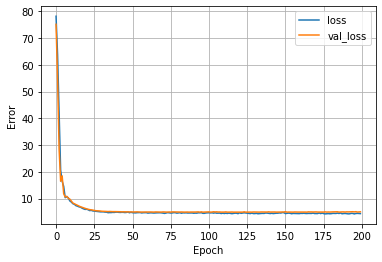

In [25]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(prediction,y_test)

4.222316671656011

In [28]:
mean_squared_error(predt,y_train)

4.379661474098844

In [29]:
r2_score(prediction,y_test)

0.40604306904164067

In [30]:
r2_score(predt,y_train)

0.4107535092771949

In [31]:
from sklearn import linear_model

In [33]:
lr_model=linear_model.LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr=lr_model.predict(x_test)
mse_lr=mean_squared_error(y_test,y_pred_lr)
print('Mean squared error from linear regression', mse_lr)

Mean squared error from linear regression 4.3588642496813135
